### Introduction


In this notebook i want to predict different arrhytmia on ECG.
based on The MIT-BIH Arrhythmia Database contains 48 half-hour excerpts
of two-channel ambulatory ECG recordings, obtained from 47 subjects 
studied by the BIH Arrhythmia Laboratory between 1975 and 1979.
Twenty-three recordings were chosen at random from a set of 
4000 24-hour ambulatory ECG recordings collected from a mixed
population of inpatients (about 60%) and outpatients 
(about 40%)
at Boston's Beth Israel Hospital; the remaining 25 recordings
were selected from the same set to include less common but
clinically significant arrhythmias that would not be
well-represented in a small random sample.


   * souces : https://physionet.org/content/mitdb/1.0.0/

Arrhythmia Dataset


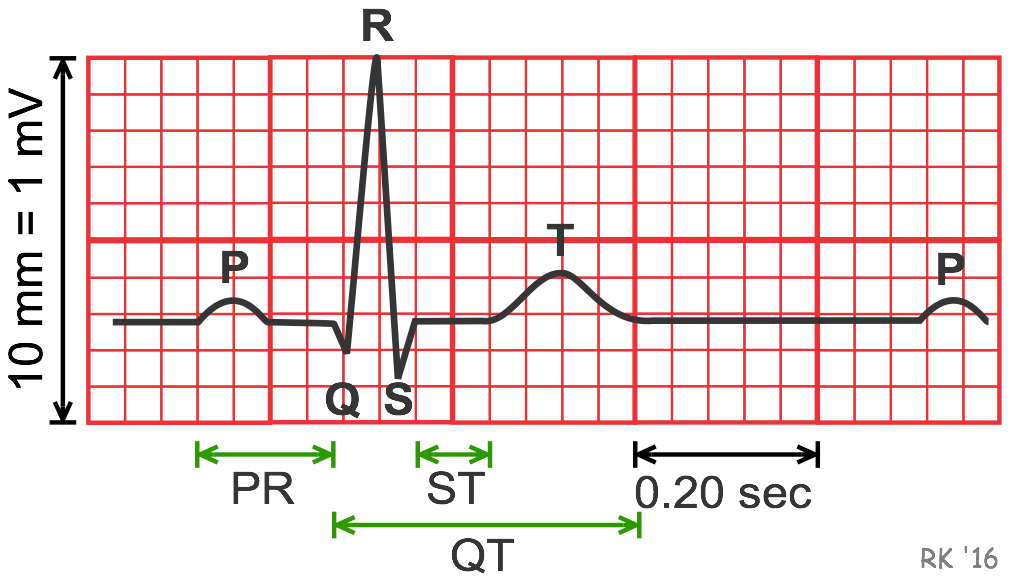

* Connecting to Google Drive 

In [1]:
#Connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


## Data Exploration and preparation 

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_df = pd.read_csv('mitbih_train.csv' ,header = None)
test_df = pd.read_csv('mitbih_test.csv' ,header = None)


In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df.shape

(87554, 188)

## Data Analysis and Visualization

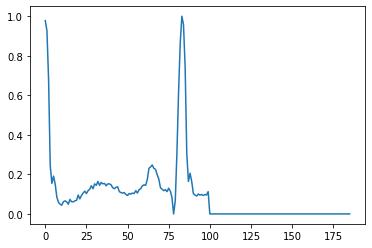

In [7]:
plt.plot(train_df.iloc[0,:186])

In [8]:
train_df[187]=train_df[187].astype(int)
test_df[187]=test_df[187].astype(int)

Data_Balance=train_df[187].value_counts()
Data_Balance

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [9]:
Data_Balance_test=test_df[187].value_counts()
Data_Balance_test

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64

* check the statues of the dataset

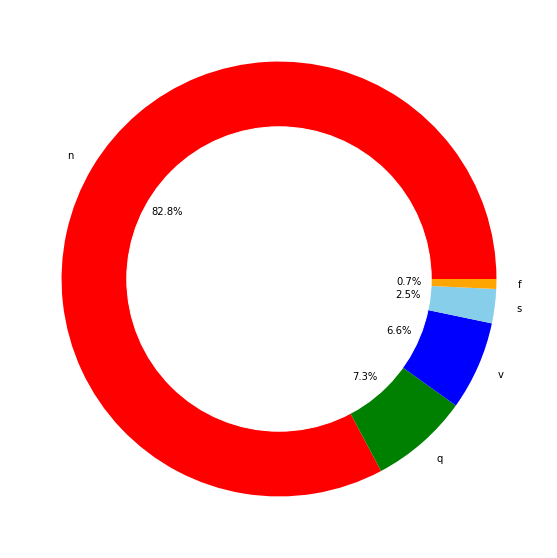

In [10]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Data_Balance, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
pip install imblearn

In [12]:

X_train=train_df.iloc[:,:186].values

X_test=test_df.iloc[:,:186].values

y_train=train_df[187]

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [14]:
y_train = pd.DataFrame(y_train)
Data_Balance = y_train.value_counts()
Data_Balance

0    72471
1    72471
2    72471
3    72471
4    72471
dtype: int64

* here we notice that the data is unbalanced so we will apply resampling to the data and data augmentation 

### Resampling and Data Augmentation





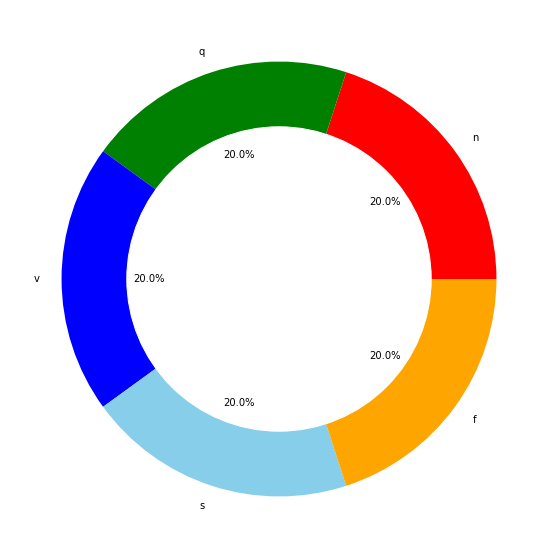

In [15]:
plt.figure(figsize=(30,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Data_Balance, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
from keras.utils.np_utils import to_categorical

y_train=to_categorical(y_train)
target_test=test_df[187]
y_test=to_categorical(target_test)


In [17]:
y_train.shape

(362355, 5)

In [18]:
X_train.shape

(362355, 186)

In [19]:

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)


In [20]:
X_train.shape

(362355, 186, 1)

In [21]:
X_test.shape

(21892, 186, 1)

In [22]:
y_train.shape

(362355, 5)

In [23]:
y_test.shape

(21892, 5)

### Building the Model
* Using CNN



In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,random_state=42,shuffle=False,train_size=0.90)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)

The shape of training data :  (326119, 186, 1) (326119, 5)
The shape of validation data :  (36236, 186, 1) (36236, 5)


In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:


model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv1D(16, 3 , activation='relu', input_shape= (186 , 1) , strides = 1 ))

model.add(tf.keras.layers.Conv1D(16, 3 , activation='relu' , strides = 1 ))

model.add(tf.keras.layers.Dropout(rate = 0.2))

model.add(tf.keras.layers.MaxPooling1D(2, strides = 2))

model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, activation='relu' , strides = 1))

model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, activation='relu' , strides = 1))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.MaxPooling1D(2, strides = 2))

model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation='relu' , strides = 1))

model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation='relu' , strides = 1))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.MaxPooling1D(2, strides = 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(30, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax'))


In [27]:
model.compile(optimizer = tf.keras.optimizers.Adam(
 learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,), loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=8)]
             

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 184, 16)           64        
                                                                 
 conv1d_1 (Conv1D)           (None, 182, 16)           784       
                                                                 
 dropout (Dropout)           (None, 182, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 91, 16)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 32)            1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 87, 32)            3104      
                                                        

In [30]:
history = model.fit(x_train, y_train,epochs=80,callbacks=callbacks, batch_size = 32 , validation_data = (X_test , y_test))

Epoch 1/80
10192/10192 [==============================] - 110s 9ms/step - loss: 0.2123 - accuracy: 0.9236 - val_loss: 0.2425 - val_accuracy: 0.9068
Epoch 2/80
10192/10192 [==============================] - 90s 9ms/step - loss: 0.0959 - accuracy: 0.9663 - val_loss: 0.1593 - val_accuracy: 0.9476
Epoch 3/80
10192/10192 [==============================] - 91s 9ms/step - loss: 0.0739 - accuracy: 0.9744 - val_loss: 0.1303 - val_accuracy: 0.9565
Epoch 4/80
10192/10192 [==============================] - 91s 9ms/step - loss: 0.0637 - accuracy: 0.9780 - val_loss: 0.1233 - val_accuracy: 0.9598
Epoch 5/80
10192/10192 [==============================] - 90s 9ms/step - loss: 0.0571 - accuracy: 0.9806 - val_loss: 0.1564 - val_accuracy: 0.9466
Epoch 6/80
10192/10192 [==============================] - 90s 9ms/step - loss: 0.0523 - accuracy: 0.9821 - val_loss: 0.1258 - val_accuracy: 0.9614
Epoch 7/80
10192/10192 [==============================] - 88s 9ms/step - loss: 0.0479 - accuracy: 0.9835 - val_loss: 

In [31]:
# evaluate ECG Test Data
model.evaluate(x_val, y_val)

1133/1133 [==============================] - 6s 5ms/step - loss: 0.0068 - accuracy: 0.9977


[0.006787638645619154, 0.9976818561553955]

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test loss' , test_loss)
print('test acc' , test_acc)

test loss 0.15399464964866638
test acc 0.9528595209121704


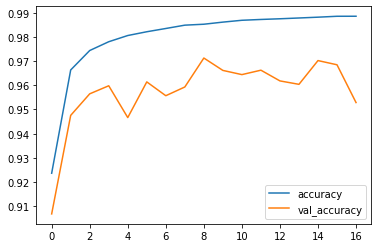

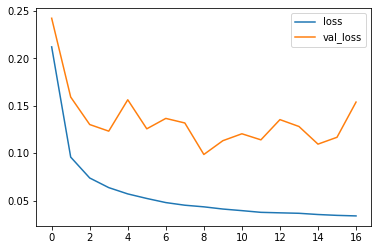

In [33]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [34]:
y_pred = model.predict(X_test, batch_size=1000)

In [35]:
y_pred

array([[9.99910593e-01, 8.93577671e-05, 2.57876227e-08, 5.34019107e-10,
        5.79272361e-13],
       [9.99012828e-01, 9.02697684e-06, 9.69576999e-04, 3.65922431e-11,
        8.51977984e-06],
       [9.99939919e-01, 6.00764033e-05, 3.08044790e-08, 5.49777726e-13,
        1.55626172e-11],
       ...,
       [1.23644868e-05, 6.45504228e-09, 1.08605161e-06, 1.28056419e-08,
        9.99986529e-01],
       [1.93715622e-14, 4.48427340e-14, 8.08420008e-13, 1.37937907e-28,
        1.00000000e+00],
       [2.60289201e-15, 9.77853290e-15, 1.07808304e-10, 2.67259791e-38,
        1.00000000e+00]], dtype=float32)

Normalized confusion matrix


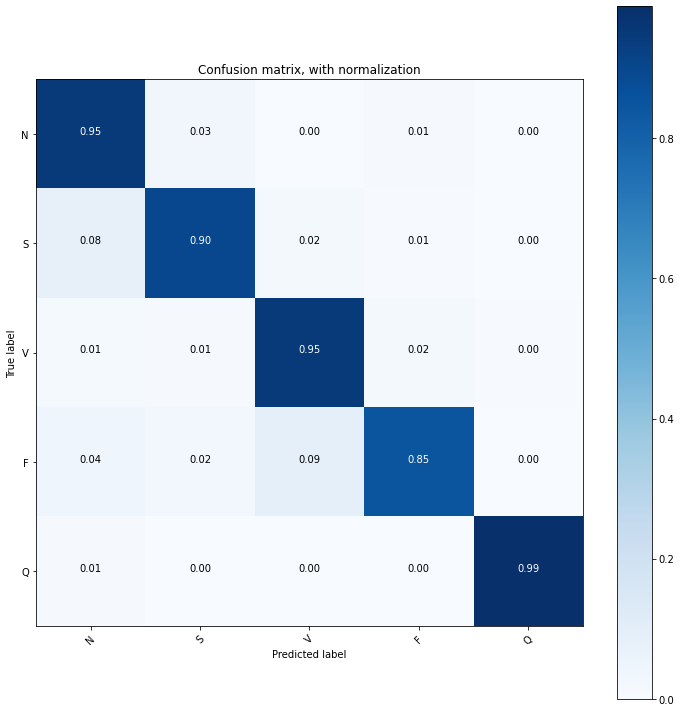

In [36]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

Confusion matrix, without normalization


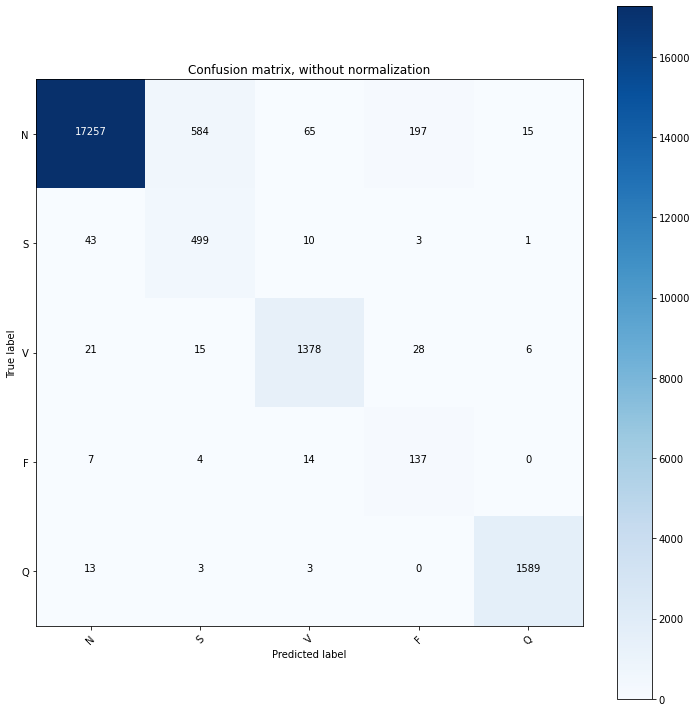

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, without normalization')
plt.show()

In [38]:
yhat = np.argmax(y_pred, axis = 1)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     18118
           1       0.45      0.90      0.60       556
           2       0.94      0.95      0.94      1448
           3       0.38      0.85      0.52       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.95     21892
   macro avg       0.75      0.93      0.81     21892
weighted avg       0.97      0.95      0.96     21892



In [41]:
import pickle 

filename = 'ECG95_Model.pkl' 
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://4baf8d80-5177-4ba9-baf0-cd437b0ce2a7/assets


In [42]:
model.save("./ECG95_Model.h5")

In [43]:
model.save_weights("./ECG95_Model_Weights" , save_format='h5')

In [44]:
filename = 'finalized95_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://b3f90018-60a8-40d2-99e4-b6ce0e9153b5/assets


In [46]:
import pandas as pd
import numpy as np
import pickle
ECG2_model = pickle.load(open(('ECG95_Model.pkl') , 'rb'))    
signal = pd.read_csv('signal2.csv')

In [45]:
loaded_model = pickle.load(open(filename, 'rb'))

In [47]:
signal.shape

(186, 1)

In [48]:
signal = np.array(signal)

In [49]:
signal = signal.reshape(1 , -1)

In [50]:
signal.shape

(1, 186)

In [51]:
prediction = ECG2_model.predict(signal)

In [52]:
prediction

array([[8.57e-01, 1.36e-01, 6.36e-03, 6.13e-06, 1.12e-04]], dtype=float32)

In [53]:
prediction = np.array(prediction)

In [54]:
prediction = prediction.ravel()

In [55]:
max_pred = max(prediction)

if max_pred == prediction[0]:

  print('it is normal' , prediction[0])
elif max_pred == prediction[1]:
  print('• Supra-ventricular premature')

elif max_pred == prediction[2]:
  print('• Premature ventricular contraction')

elif max_pred == prediction[3]:
  print('• Fusion of ventricular and normal')

elif max_pred == prediction[4]:
  print('• Unclassifiable beat')  


it is normal 0.85742027
